In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lista de archivos (ajusta los nombres según los tuyos)
archivos = ["/content/drive/MyDrive/Data_for_2020.xlsx", "/content/drive/MyDrive/Data_for_2021.xlsx", "/content/drive/MyDrive/Data_for_2022.xlsx",
            "/content/drive/MyDrive/Data_for_2023.xlsx", "/content/drive/MyDrive/Data_for_2024.xlsx"]

In [3]:
# Lista para almacenar los dataframes procesados
dataframes = []

for archivo in archivos:
    # Extraer el año desde el nombre del archivo
    año = archivo.split("_for_")[1].split(".")[0]

    # Leer solo las columnas necesarias
    df = pd.read_excel(archivo, usecols=["Ladder score", "Country", "Social support", "Perceptions of corruption"])

    # Agregar la columna del año
    df["Year"] = int(año)

    # Almacenar en la lista
    dataframes.append(df)

# Unir todos los años en un solo dataframe
df_final = pd.concat(dataframes, ignore_index=True)

# Mostrar primeras filas
print(df_final.head())

       Country  Ladder score  Social support  Perceptions of corruption  Year
0      Finland        7.8087        0.954330                   0.195445  2020
1      Denmark        7.6456        0.955991                   0.168489  2020
2  Switzerland        7.5599        0.942847                   0.303728  2020
3      Iceland        7.5045        0.974670                   0.711710  2020
4       Norway        7.4880        0.952487                   0.263218  2020


In [4]:
# Guardar el dataframe final en un archivo CSV
df_final.to_excel("/content/drive/MyDrive/merged_happiness_data.xlsx", index=False)

In [5]:
#Calcular el promedio del índice de felicidad por país
ranking_promedio = df_final.groupby("Country")["Ladder score"].mean()

#Encontrar el país más feliz y menos feliz
pais_mas_feliz = ranking_promedio.idxmax()
pais_menos_feliz = ranking_promedio.idxmin()

print(f"El país más feliz en los últimos 5 años es: {pais_mas_feliz} con un promedio de {ranking_promedio.max():.2f}")
print(f"El país menos feliz en los últimos 5 años es: {pais_menos_feliz} con un promedio de {ranking_promedio.min():.2f}")


El país más feliz en los últimos 5 años es: Finland con un promedio de 7.80
El país menos feliz en los últimos 5 años es: Afghanistan con un promedio de 2.21


In [6]:
#datos de Argentina
df_argentina = df_final[df_final["Country"] == "Argentina"]

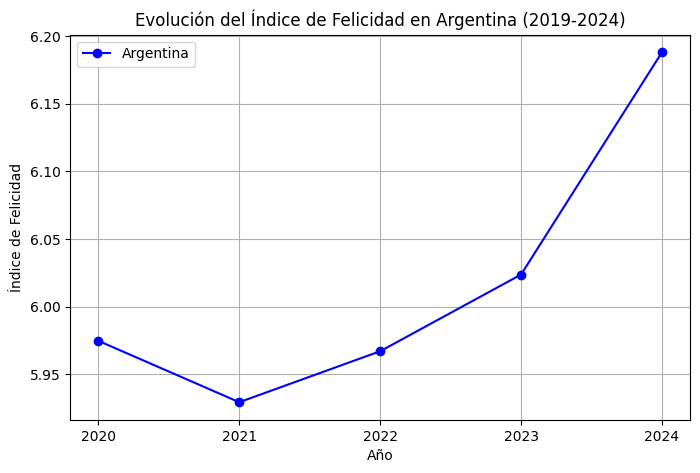

In [7]:
#Graficar
plt.figure(figsize=(8, 5))
plt.plot(df_argentina["Year"], df_argentina["Ladder score"], marker="o", linestyle="-", color="b", label="Argentina")

plt.xlabel("Año")
plt.ylabel("Índice de Felicidad")
plt.title("Evolución del Índice de Felicidad en Argentina (2019-2024)")
plt.xticks(df_argentina["Year"])  # Asegurar que se muestren todos los años
plt.legend()
plt.grid(True)

plt.show()

In [8]:
# Cargar los datos procesados
df2 = pd.read_csv("/content/drive/MyDrive/merged_happiness_data.csv")

In [9]:
# Mostrar información general del dataset
print("Información del DataFrame:")
print(df2.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    729 non-null    object 
 1   Ladder score               728 non-null    float64
 2   Social support             725 non-null    float64
 3   Perceptions of corruption  725 non-null    float64
 4   Year                       729 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 28.6+ KB
None


In [10]:
# Verificar si hay NaN o valores infinitos
print(df2[["Social support", "Perceptions of corruption"]].isna().sum())  # NaN por columna
print((df2[["Social support", "Perceptions of corruption"]] == float('inf')).sum())  # Infinitos por columna

Social support               4
Perceptions of corruption    4
dtype: int64
Social support               0
Perceptions of corruption    0
dtype: int64


In [11]:
# Eliminar filas con NaN o infinitos en las columnas relevantes
df3 = df2.dropna(subset=["Social support", "Perceptions of corruption", "Ladder score"])
df3 = df2[~df2[["Social support", "Perceptions of corruption"]].isin([float('inf'), -float('inf')]).any(axis=1)]

In [12]:
# Descripción estadística de las variables numéricas
print("\n Resumen estadístico:")
print(df3.describe())


 Resumen estadístico:
       Ladder score  Social support  Perceptions of corruption         Year
count    728.000000      725.000000                 725.000000   729.000000
mean       5.524737        0.890558                   0.502220  2021.956104
std        1.113815        0.248386                   0.322678     1.420317
min        1.721000        0.000000                   0.000000  2020.000000
25%        4.770800        0.746529                   0.153518  2021.000000
50%        5.582900        0.877169                   0.619799  2022.000000
75%        6.323925        0.957225                   0.806712  2023.000000
max        7.842100        1.616525                   0.939343  2024.000000


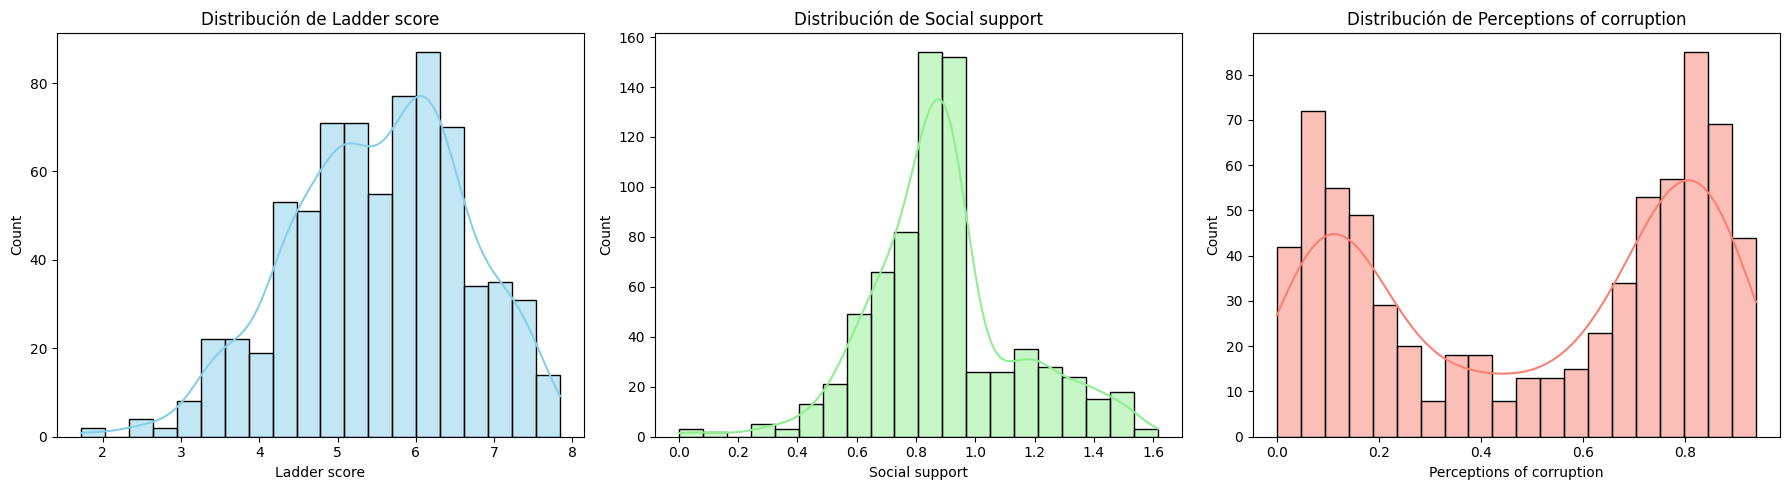

In [14]:
#Histogramas para visualizar la distribución de los datos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
variables = ["Ladder score", "Social support", "Perceptions of corruption"]
colors = ["skyblue", "lightgreen", "salmon"]

for i, var in enumerate(variables):
    sns.histplot(df3[var], bins=20, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribución de {var}")

plt.tight_layout()
plt.show()


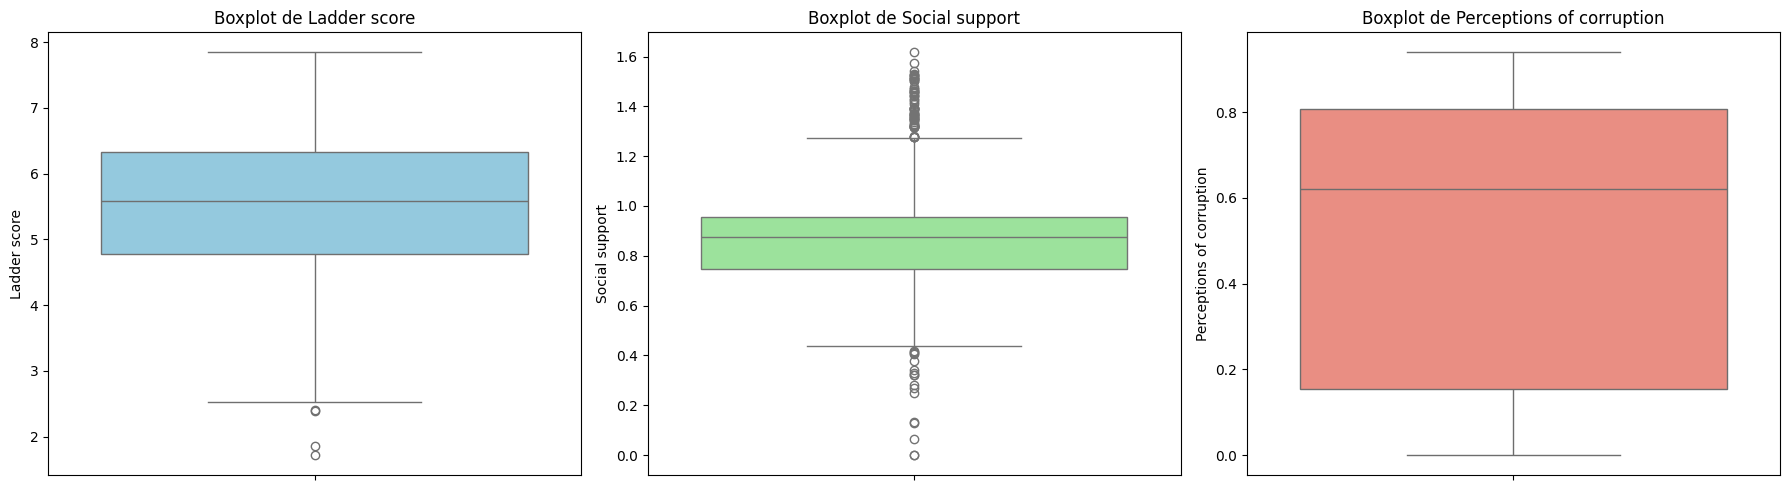

In [15]:
#valores atípicos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(variables):
    sns.boxplot(y=df3[var], ax=axes[i], color=colors[i])
    axes[i].set_title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


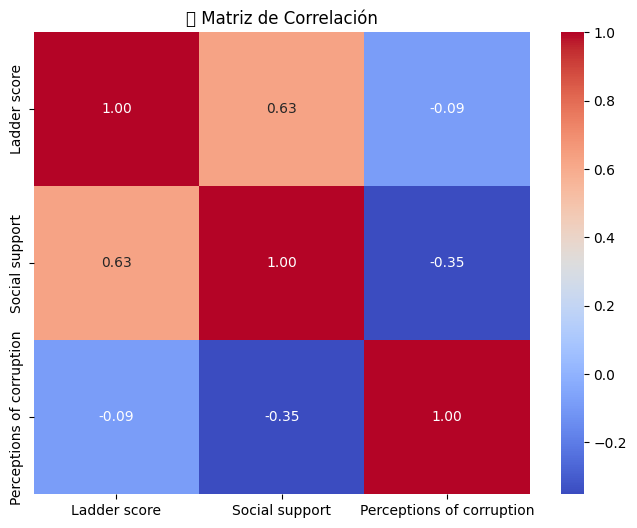

In [16]:
#Correlación
correlation_matrix = df3[variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Matriz de Correlación")
plt.show()


<ipython-input-17-6687b8f63f79>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df3, x="Year", y="Ladder score", estimator="mean", ci=None, marker="o", color="blue")


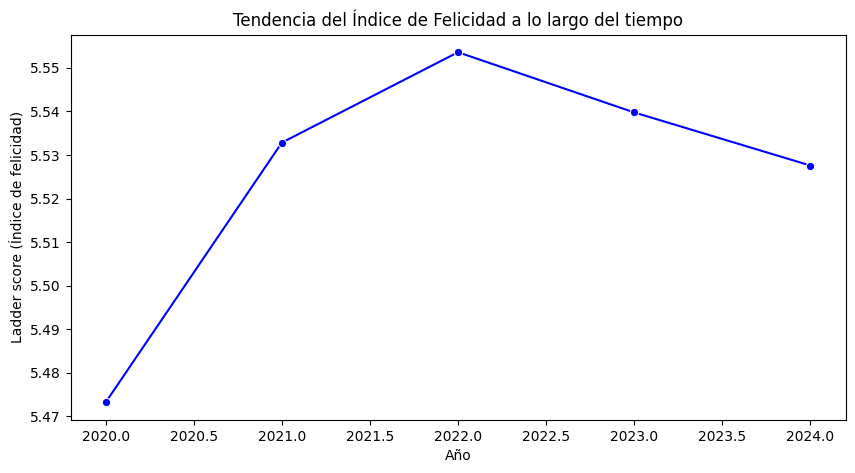

In [17]:
#Tendencia del índice de felicidad por año
plt.figure(figsize=(10, 5))
sns.lineplot(data=df3, x="Year", y="Ladder score", estimator="mean", ci=None, marker="o", color="blue")
plt.title("Tendencia del Índice de Felicidad a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Ladder score (Índice de felicidad)")
plt.show()